## Simple Linear Regression.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [5]:
df=pd.read_csv('height-weight.csv')
df.head(5)


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


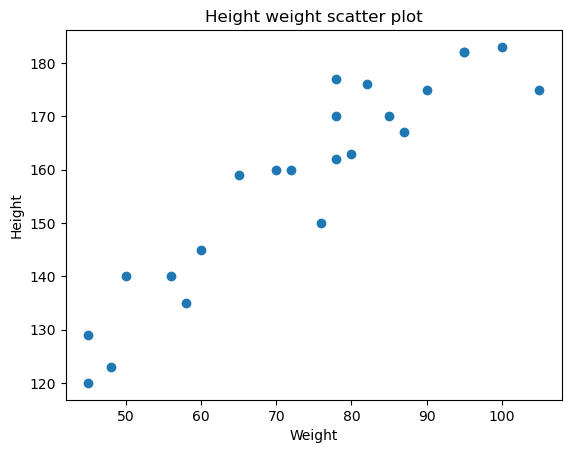

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height weight scatter plot')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [9]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [11]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


<Axes: >

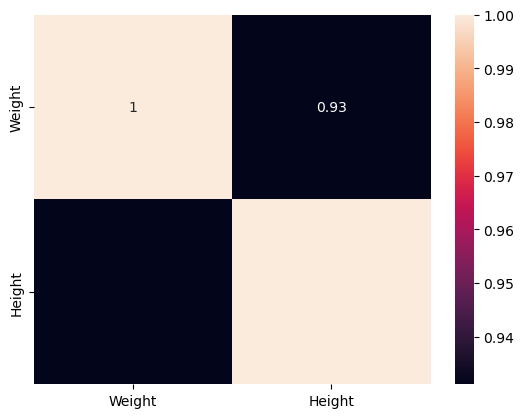

In [13]:
sns.heatmap(df.corr(),annot=True)

In [22]:
X=df[['Weight']]
y=df['Height']


In [23]:
## doing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17, 1), (6, 1), (17,), (6,))

In [29]:
## standardize our data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [31]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [32]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [34]:
## training our model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[17.2982057]
156.47058823529412


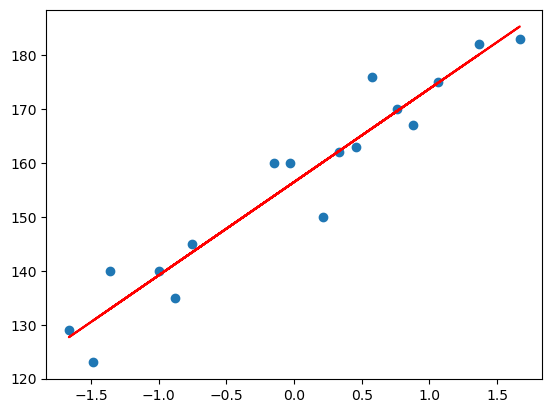

In [37]:
## so above linear regression model gives as y=17.2982057*x+156.4705882352941;
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_train),c='red')

### our best fit line is 
#### for train data y_train=17.2982057*X_train+156.4705882352941;
#### similarly for out test data it is  y_test=17.2982057*X_test+156.4705882352941;

In [38]:
## lets do the prediction for our test data
y_pred=lr.predict(X_test)


In [39]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [40]:
y_test

15    177
9     170
0     120
8     182
17    159
12    175
Name: Height, dtype: int64

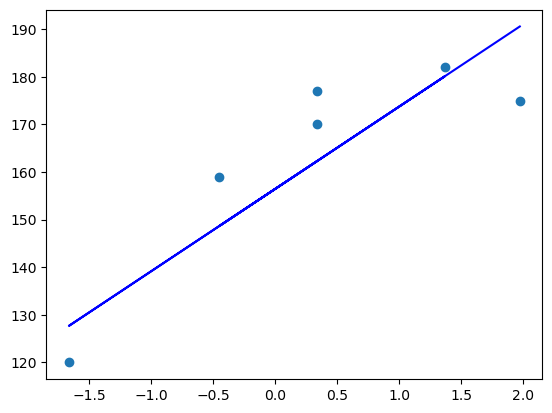

In [43]:
## so above linear regression model gives as y=17.2982057*x+156.4705882352941;
plt.scatter(X_test,y_test)
plt.plot(X_test,lr.predict(X_test),c='b')

In [45]:
## finding the error and accuracy (score) of the model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)
print(mae)
print(mse)

0.7360826717981276
9.665125886795005
114.84069295228699


In [ ]:
## predicting the height for a new data point of weight eg.. 80kg
